<div class="alert alert-success">
<h3><center>" DIAGNOSA PENGUNJUNG YANG DATANG KE LONDON MENGGUNAKAN METODE ANN  "<center> </h4>
<ul>
<li style="text-align: left;">
<h3><strong>NAMA &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp;  : Pininggit Harun Kusuma Nasution</strong></h3>
</li>
<li style="text-align: left;">
<h3><strong>KELAS &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&ensp; : SK 5A</strong></h3>
</li>
<li style="text-align: left;">
<h3><strong>JURUSAN &emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;: Sistem Komputer</strong></h3>
</li>
<li style="text-align: left;">
<h3><strong>MATA KULIAH &emsp;&emsp;&emsp; : Kecerdasan Buatan</strong></h3>
</li>
<li style="text-align: left;">
<h3><strong>DOSEN PENGAMPUH: Prof. Siti Nurmaini</strong></h3>
</li>
</ul>
</div>

<div class="alert alert-success">
 <font size="3"><p align="justify">
    <strong>Daftar Modul yang digunakan :</strong>
<ul>
<li style="text-align: left;">
    <strong>NUMPY =</strong> Modul ini berfungsi untuk melakukan beberapa fungsi matematika seperti array, dan matriks.
</li> 
</ul>     
<ul>
<li style="text-align: left;">
<strong>PANDAS =</strong> Modul ini akan digunakan untuk Load Dataset.
</li>
</ul>     
<ul>
<li style="text-align: left;">
<strong>MATPLOTLIB =</strong> Modul ini digunakan untuk mencetak grafik pada beberapa event seperti grafik distribusi variabel, grafik confusion matrix dan grafik akurasi.
</li>
</ul>
<ul>
<li style="text-align: left;">
<strong>SEABORN =</strong> Modul ini digunakan untuk plot grafik distribusi nilai dari Class (output), modul ini berbasis matplotlib.
</li>
</ul>     
<ul>
<li style="text-align: left;">
<strong>SKLEARN =</strong> Modul ini digunakan untuk mengolah data Machine Learning seperti preprocessing.
</li>
</ul>
<ul>
<li style="text-align: left;">
<strong>KERAS =</strong> Modul ini digunakan untuk membuat, menambah, dan mengevaluasi model neural network.
</li>
</ul>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 
np.random.seed(7) 
import keras 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import confusion_matrix 
from keras.models import Sequential 
from keras.layers import Dense 
from keras.utils.np_utils import to_categorical 
from keras.layers import Dense, Dropout 
from keras.activations import relu 
from keras.optimizers import Adam 

Using TensorFlow backend.


<div class="alert alert-success">
<h3>Dataset yang digunakan adalah "london_merged.csv" </h3>    
<div>

In [2]:
dataset = pd.read_csv ("london_merged.csv")

<div class="alert alert-success"> 
    <font size="3"><p align="justify">head() berfungsi untuk melihat isi dari dataset yang dipakai (jika tidak diisi, akan tampil secara random).

In [3]:
dataset.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


<div class="alert alert-success">
 <font size="3"><p align="justify"><strong>Berikut adalah spesifikasi dataset yang digunakan :</strong>
<ul>
<li style="text-align: left;">
    Input terdiri dari 8 variabel sesuai dengan yang akan di bahas.
</li> 
</ul>

<ul>
<li style="text-align: left;">
Output terdiri dari 1 variabel, dengan 4 kondisi, yaitu 0, 1, 2, dan 3  .
</li>
</ul>
    
<div>

In [4]:
dataset = dataset.drop(columns=['timestamp'])
dataset.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


<div class="alert alert-success"> 
    <font size="3"><p align="justify">describe() berfungsi untuk menunjukkan rangkuman statistik seperti rata-rata, median, dan lain-lain pada kolom.

In [5]:
dataset.describe()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.913063,2.722752,0.022051,0.285403,1.492075
std,1085.108068,5.571818,6.615145,14.313186,7.894570,2.341163,0.146854,0.451619,1.118911
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000


In [6]:
dataset['season'].value_counts()

0.0    4394
1.0    4387
3.0    4330
2.0    4303
Name: season, dtype: int64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 9 columns):
cnt             17414 non-null int64
t1              17414 non-null float64
t2              17414 non-null float64
hum             17414 non-null float64
wind_speed      17414 non-null float64
weather_code    17414 non-null float64
is_holiday      17414 non-null float64
is_weekend      17414 non-null float64
season          17414 non-null float64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


<div class="alert alert-success"><strong>HISTOGRAM :</strong>
<div class="alert alert-success">
<font size="3"><p align="justify">Histogram adalah plot yang dapat menemukan dan menunjukkan distribusi frekuensi (bentuk) yang mendasari serangkaian data.

<font size="3"><p align="justify">hist() befungsi untuk menemukan dan menunjukan distribusi frekuensi berdasarkan serangkaian data, dan plt.show() berfungsi untuk menampilkannya dalam bentuk grafik.

In [45]:
data1 = dataset[dataset.season==0]
data2 = dataset[dataset.season==1]

<div class="alert alert-success">
<font size="3"><p align="justify">sns.countplot() berfungsi untuk menampilkan grafik dangan perhitungan berdasarkan class.

In [48]:
from sklearn.utils import resample
data2_upsample = resample(data2, replace=True,n_samples=100,random_state=88)
dataset_resampled = pd.concat([data1, data2_upsample])

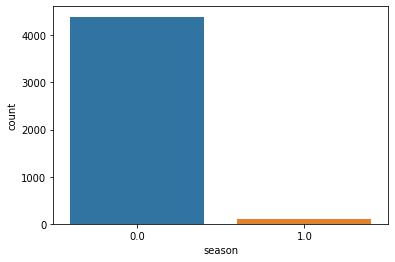

In [49]:
sns.countplot(x=dataset_resampled['season'],data=dataset)

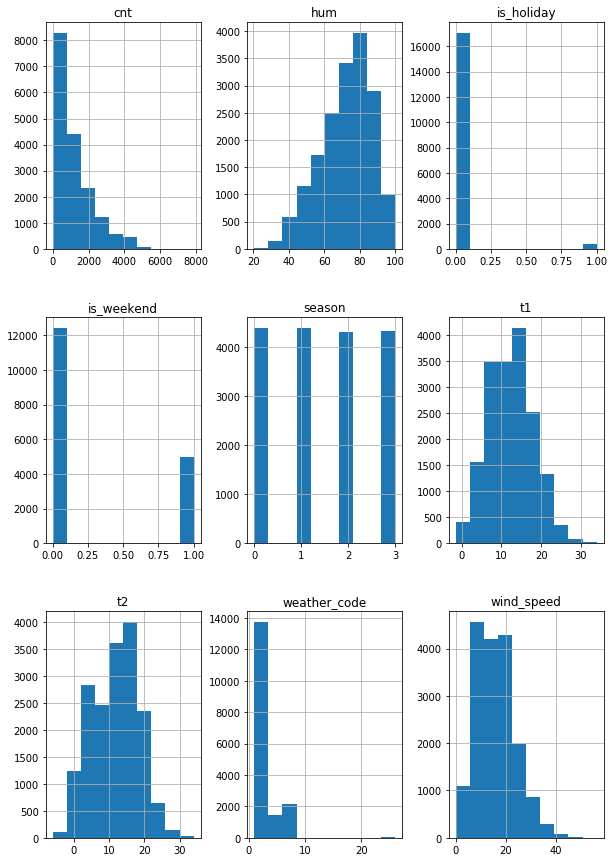

In [8]:
dataset.hist(figsize=(10,15))
plt.show()

<div class="alert alert-success"><strong>BOXPLOT :</strong>
<div class="alert alert-success">
<font size="3"><p align="justify">Boxplot berfungsi penyajian grafis lainnya yang bisa merangkum informasi lebih detail mengenai distribusi nilai-nilai data pengamatan adalah Box and Whisker Plots atau lebih sering disebut dengan BoxPlot. bentuknya terdiri dari Box (kotak) dan Whisker. Boxplot merupakan ringkasan distribusi sampel yang disajikan secara grafis yang bisa menggambarkan bentuk distribusi data, ukuran tendensi sentral dan ukuran penyebaran data pengamatan. 

cnt                AxesSubplot(0.125,0.821923;0.352273x0.0580769)
t1              AxesSubplot(0.547727,0.821923;0.352273x0.0580769)
t2                 AxesSubplot(0.125,0.752231;0.352273x0.0580769)
hum             AxesSubplot(0.547727,0.752231;0.352273x0.0580769)
wind_speed         AxesSubplot(0.125,0.682538;0.352273x0.0580769)
weather_code    AxesSubplot(0.547727,0.682538;0.352273x0.0580769)
is_holiday         AxesSubplot(0.125,0.612846;0.352273x0.0580769)
is_weekend      AxesSubplot(0.547727,0.612846;0.352273x0.0580769)
season             AxesSubplot(0.125,0.543154;0.352273x0.0580769)
dtype: object

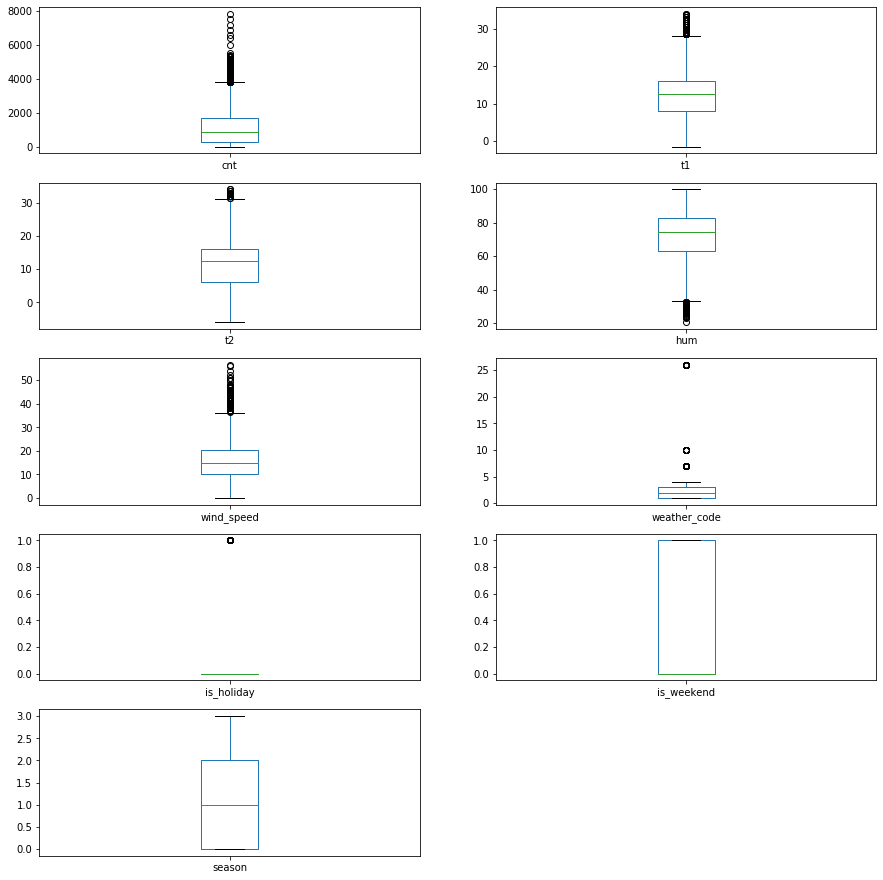

In [9]:
dataset.plot(kind='box', subplots=True, layout=(11,2), sharex=False, sharey=False, figsize=(15,35))

<div class="alert alert-success">
<font size="3"><p align="justify">Nilai variabel x diambil dari kolom 0-8 (Input) dan Nilai variabel y diambil dari kolom 9 (Ouput).

In [10]:
a = dataset.iloc[:, 0:8].values
b = dataset.iloc[:, 8].values

In [11]:
dataset2 = pd.DataFrame(a)
dataset2

,0,1,2,3,4,5,6,7
0,182.0,3.0,2.0,93.0,6.0,3.0,0.0,1.0
1,138.0,3.0,2.5,93.0,5.0,1.0,0.0,1.0
2,134.0,2.5,2.5,96.5,0.0,1.0,0.0,1.0
3,72.0,2.0,2.0,100.0,0.0,1.0,0.0,1.0
4,47.0,2.0,0.0,93.0,6.5,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
17409,1042.0,5.0,1.0,81.0,19.0,3.0,0.0,0.0
17410,541.0,5.0,1.0,81.0,21.0,4.0,0.0,0.0
17411,337.0,5.5,1.5,78.5,24.0,4.0,0.0,0.0
17412,224.0,5.5,1.5,76.0,23.0,4.0,0.0,0.0


<div class="alert alert-success"><strong>FEATURE NORMALIZATION :</strong>
<font size="3"><p align="justify">Normalisasi adalah konsep yang diperlukan untuk mengubah semua fitur ke skala yang sama. Hal ini memungkinkan konvergensi yang lebih cepat pada pembelajaran, dan pengaruh yang lebih seragam untuk semua bobot. Dalam hal ini digunakan MinMaxScaler yang mengubah fitur dengan penskalaan setiap fitur ke rentang yang diberikan (menjadi antara 0, 1, 2, dan 3).

<div class="alert alert-success">
<font size="3"><p align="justify">Melakukan scaling dataset dan penskalaan setiap fitur ke rentang yang diberikan.

<div class="alert alert-success">
<font size="3"><p align="justify">Merubah atau melakukan scaling pada nilai variabel a.

In [12]:
from keras.utils.np_utils import to_categorical
scaler= MinMaxScaler()
a_scaled = scaler.fit_transform(a)
dataset_dataframe = pd.DataFrame(a_scaled)
dataset_dataframe.head()

,0,1,2,3,4,5,6,7
0,0.023155,0.126761,0.2000,0.911950,0.106195,0.08,0.0,1.0
1,0.017557,0.126761,0.2125,0.911950,0.088496,0.00,0.0,1.0
2,0.017048,0.112676,0.2125,0.955975,0.000000,0.00,0.0,1.0
3,0.009160,0.098592,0.2000,1.000000,0.000000,0.00,0.0,1.0
4,0.005980,0.098592,0.1500,0.911950,0.115044,0.00,0.0,1.0


In [13]:
a_scaled.shape

(17414, 8)

<div class="alert alert-success">
<font size="3"><p align="justify">Mengkonversi class bilangan bulat menjadi bilangan biner.

In [14]:
from keras.utils.np_utils import to_categorical
b_categorical = to_categorical(b)
b_categorical.shape

(17414, 4)

<div class="alert alert-success">
<font size="3"><p align="justify">Membagi dataset dengan training 80% dari data dan testing 20% dari data dan setiap data pilih secara acak.

In [15]:
a_train, a_test, b_train, b_test = train_test_split(a_scaled, b_categorical, train_size= 0.8, test_size=0.2, random_state=4)

In [16]:
b_real=b_test

<div class="alert alert-success">
<font size="3"><p align="justify">Mencetak ukuran data training dan testing, dimana a_train dan a_test untuk masukan, sedangkan b_train dan b_test untuk keluaran.

In [17]:
print('Train data shape : ', a_train.shape, b_train.shape)
print('Test data shape : ', a_test.shape, b_test.shape)

Train data shape :  (13931, 8) (13931, 4)
Test data shape :  (3483, 8) (3483, 4)


<div class="alert alert-success">
<font size="3"><p align="justify">Mencetak kelas keluaran yang dihasilkan (0 atau 1).

In [18]:
classes = np.unique(b_train)
nClasses = len(classes)
print('Total number of outputs : ', classes)
print('Output Classes : ', nClasses)

Total number of outputs :  [0. 1.]
Output Classes :  2


<div class="alert alert-success"><strong>SEQUENTIAL MODEL :</strong>
<div class="alert alert-success">
<font size="3"><p align="justify">Model Sekuensial adalah tumpukan lapisan linear. Lapisan pertama dalam model Sequential ( hanya yang pertama, karena lapisan berikutnya dapat melakukan inferensi bentuk otomatis) perlu menerima informasi tentang bentuk inputnya. Kemudian untuk menambahkan lapisan cukup dengan menambahkan perintah add.

<div class="alert alert-success">
<font size="3"><p align="justify">Dalam hal ini, terdapat input layer, hidden layer, dan output layer. Dimana ada yang menggunakan Rectified Linear Unit atau yang dikenal sebagai ReLU, adalah cara paling umum dan dasar untuk memperkenalkan non-linearitas ke dalam jaringan saraf. Fungsi ini hanya max (0, a), dan Sigmoid yang merupakan fungsi aktivasi berkelanjutan dan smooth yang paling umum.

In [19]:
model = Sequential() 
model.add(Dense(10, input_dim=8, activation='relu', use_bias=0.2))
model.add(Dense(25, activation=relu, use_bias=0.2))
model.add(Dense(4, activation='sigmoid')) 

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_2 (Dense)              (None, 25)                275       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 104       
Total params: 469
Trainable params: 469
Non-trainable params: 0
_________________________________________________________________


<div class="alert alert-success">
<font size="3"><p align="justify">compile() berfungsi mengembalikan objek kode Python dari sumber (string normal, string byte, atau objek). Dalam hal ini menggunakan optimizer adam dan categorical loss yaitu binary crossentropy.

In [21]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [22]:
b_test.shape

(3483, 4)

<div class="alert alert-success">
<font size="3"><p align="justify">Untuk melatih model kita menggunakan model.fit dimana a_train adalah numpy array yang digunakan sebagai data training untuk inputan, b_test adalah numpy array yang digunakan untuk data target atau keluaran, batch_size jumlah sampel per pembaharuan gradien jika tidak kita set maka nilai nya akan menggunakan nilai default yaitu 4, epochs jumlah epochs untuk melatih model, epochs adalah iterasi atas seluruh data a dan b yang disediakan, 1 kali epochs sama dengan satu kali perhitungan maju mundur, validation_data(20%) untuk mengevaluasi kerugian dan metrik model apa pun pada setiap akhir epochs. 

In [23]:
history = model.fit(a_train,b_train, validation_data=(a_test, b_test), epochs=10, batch_size=4)


Train on 13931 samples, validate on 3483 samples
Epoch 1/10
13931/13931 [==============================] - 12s 838us/step - loss: 0.4673 - accuracy: 0.7774 - val_loss: 0.4290 - val_accuracy: 0.7934
Epoch 2/10
13931/13931 [==============================] - 9s 651us/step - loss: 0.4272 - accuracy: 0.7913 - val_loss: 0.4138 - val_accuracy: 0.8006
Epoch 3/10
13931/13931 [==============================] - 11s 796us/step - loss: 0.4161 - accuracy: 0.8008 - val_loss: 0.4065 - val_accuracy: 0.8084
Epoch 4/10
13931/13931 [==============================] - 10s 741us/step - loss: 0.4100 - accuracy: 0.8043 - val_loss: 0.4049 - val_accuracy: 0.8076
Epoch 5/10
13931/13931 [==============================] - 9s 628us/step - loss: 0.4062 - accuracy: 0.8065 - val_loss: 0.3976 - val_accuracy: 0.8130
Epoch 6/10
13931/13931 [==============================] - 11s 783us/step - loss: 0.4028 - accuracy: 0.8086 - val_loss: 0.3952 - val_accuracy: 0.8142
Epoch 7/10
13931/13931 [==============================] - 

In [24]:
scores = model.evaluate(a_test, b_test)
print("Accuracy data Test = %.2f%%" % (scores[1]*100))

3483/3483 [==============================] - 0s 34us/step
Accuracy data Test = 81.88%


<div class="alert alert-success"><strong>TRAINING AND TESTING ACCURACY</strong>

C:\Users\HarunPininggit\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'lowwer right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


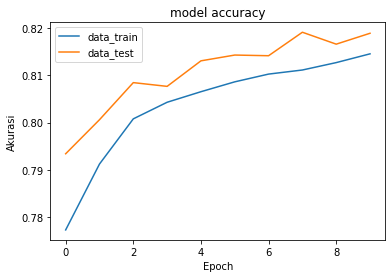

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Akurasi')
plt.xlabel('Epoch')
plt.legend(['data_train', 'data_test'], loc='lowwer right')
plt.show()

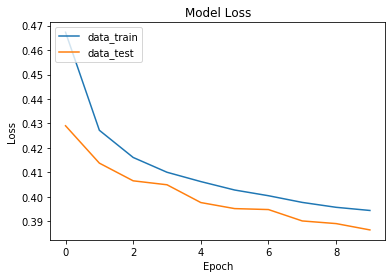

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['data_train', 'data_test'], loc='upper left')
plt.show()

<div class="alert alert-success">
<font size="3"><p align="justify">Tampilan prediksi data,dan Mencetak predict dari input yang akan diperoleh

In [27]:
predict = model.predict(a_scaled)
predict

array([[2.5135607e-01, 1.6987324e-05, 1.6068235e-01, 5.8696163e-01],
       [2.9680443e-01, 3.1977892e-05, 1.9166008e-01, 5.2164590e-01],
       [2.7804151e-01, 2.0802021e-05, 2.3907027e-01, 4.9614707e-01],
       ...,
       [2.5567058e-01, 5.2094460e-05, 8.6247206e-02, 6.4843476e-01],
       [2.6013836e-01, 3.8921833e-05, 8.1611931e-02, 6.4731199e-01],
       [2.1582776e-01, 1.2516975e-05, 7.7740878e-02, 6.9474238e-01]],
      dtype=float32)

In [28]:
scores = model.evaluate(a_scaled, b_categorical)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17414/17414 [==============================] - 1s 31us/step

accuracy: 81.67%


In [29]:
print(scores[1])

0.8166704773902893


<div class="alert alert-success"><strong>CONFUSION MATRIX :</strong>
<div class="alert alert-success">
<font size="3"><p align="justify">Confusion matrix merupakan salah satu metode yang dapat digunakan mengukur kinerja suatu metode klasifikasi. Pada dasarnya confusion matrix mengandung informasi yang membandingkan hasil klasifikasi dilakukan sistem dengan hasil klasifikasi yang seharusnya 

In [30]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(b_categorical.argmax(axis=1), predict.argmax(axis=1))

<div class="alert alert-success">
<font size="3"><p align="justify">Konsep dari confusion matrix adalah sebagai berikut<br>

In [31]:
CM

array([[2120,  340,  477, 1457],
       [ 206, 3607,  500,   74],
       [ 649, 1035, 1724,  895],
       [ 601,   18,  461, 3250]], dtype=int64)

<div class="alert alert-success"><strong>ACCURACY :</strong>
<div class="alert alert-success">
<font size="3"><p align="justify">Melalui confusion matrix, rumus dalam menghitung nilai akurasinya

In [32]:
accuracy = ((2070+3607) / (2070+18+83+202+451+556+3607))
print("\n%s: %.2f%%" % ("Accuracy", accuracy*100))


Accuracy: 81.25%


<div class="alert alert-success"><strong>RECALL :</strong>
<div class="alert alert-success">
<font size="3"><p align="justify">Melalui confusion matrix, rumus dalam menghitung nilai recallnya

In [33]:
recall = ((3607) / (83+3607))
print("\n%s: %.2f%%" % ("Recall", recall*100))


Recall: 97.75%


<div class="alert alert-success"><strong>TRUE NEGATIF RATE :</strong>
<div class="alert alert-success">
<font size="3"><p align="justify">Melalui confusion matrix, rumus dalam menghitung nilai TNRnya

In [34]:
TrueNegatifRate = ((18) / (2070+18))
print("\n%s: %.2f%%" % ("TrueNegatifRate",TrueNegatifRate))


TrueNegatifRate: 0.01%


<div class="alert alert-success"><strong>PRECISSION :</strong>
<div class="alert alert-success">
<font size="3"><p align="justify">Melalui confusion matrix, rumus dalam menghitung nilai presisinya

In [35]:
precission =((3607) / (18+3607))
print("\n%s: %.2f%%" % ("precission", precission*100))


precission: 99.50%


In [36]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [37]:
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(1, len(acc) + 1 )

<Figure size 432x288 with 0 Axes>

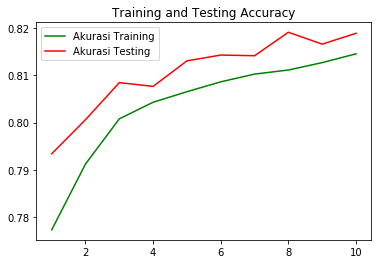

<Figure size 432x288 with 0 Axes>

In [38]:
plt.plot(epochs, acc, 'g' , color='green', label='Akurasi Training')
plt.plot(epochs, val_acc, 'r', color='red', label='Akurasi Testing')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.figure()

<Figure size 432x288 with 0 Axes>

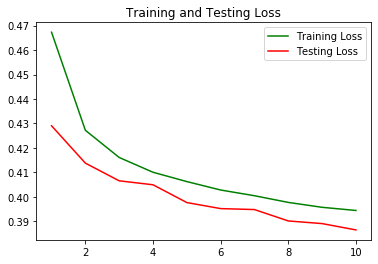

<Figure size 432x288 with 0 Axes>

In [39]:
plt.plot(epochs, loss, 'g' , color='green', label='Training Loss')
plt.plot(epochs, val_loss, 'r', color='red', label='Testing Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.figure()

<div class="alert alert-success"><strong>F1-SCORE :</strong>
<div class="alert alert-success">
<font size="3"><p align="justify">Melalui confusion matrix, rumus dalam menghitung nilai F1-Scorenya

In [42]:
#F1-Score = ((2*Precession*Recall) / (Precession+Recall))
F1 = ((2 * precission * recall) / (precission + recall))
print("\n%s: %.2f%%" % ("F1",F1))


F1: 0.99%
